In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()

## Reading &Understanding the data

In [3]:
#read the dataset
bikedata = pd.read_csv("day.csv")
bikedata.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
#check shape
bikedata.shape

(730, 16)

In [5]:
#info about the data
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Since there is 0 non-null values there is no missing value in the dataset

In [6]:
#summary
bikedata.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## EDA

In [7]:
# drop yr and mnth,instant and holiday as we have related columns
bikedata.drop(['holiday', 'instant'], axis=1, inplace= True)
bikedata.head()

dteday  season  yr  mnth  weekday  workingday  weathersit       temp  \
0  01-01-2018       1   0     1        6           0           2  14.110847   
1  02-01-2018       1   0     1        0           0           2  14.902598   
2  03-01-2018       1   0     1        1           1           1   8.050924   
3  04-01-2018       1   0     1        2           1           1   8.200000   
4  05-01-2018       1   0     1        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [8]:
# drop dteday as we extracted required columns
bikedata.drop(['dteday'], axis=1, inplace= True)
bikedata.head()

season  yr  mnth  weekday  workingday  weathersit       temp     atemp  \
0       1   0     1        6           0           2  14.110847  18.18125   
1       1   0     1        0           0           2  14.902598  17.68695   
2       1   0     1        1           1           1   8.050924   9.47025   
3       1   0     1        2           1           1   8.200000  10.60610   
4       1   0     1        3           1           1   9.305237  11.46350   

       hum  windspeed  casual  registered   cnt  
0  80.5833  10.749882     331         654   985  
1  69.6087  16.652113     131         670   801  
2  43.7273  16.636703     120        1229  1349  
3  59.0435  10.739832     108        1454  1562  
4  43.6957  12.522300      82        1518  1600

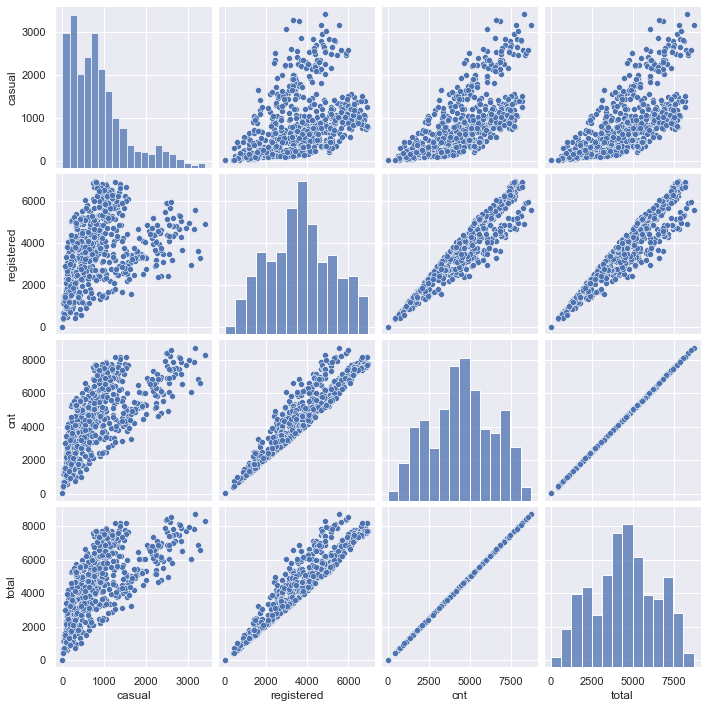

In [9]:
# Checking the relationship between casual, registered and cnt column
bike_ch = bikedata[['casual','registered','cnt']]
# Creating a column whch will show the value of casual + registered
bike_ch['total'] = bike_ch['casual'] + bike_ch['registered']
sns.pairplot(bike_ch)
plt.show()

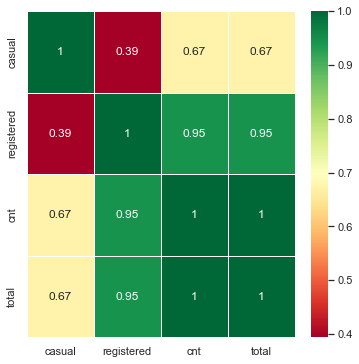

In [10]:
# also checking the correlation of the variables 
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_ch.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [11]:
# From the pairplot as well as the correlation heatmap, we can conclude that total bike rental value 'cnt = 'casual' + 'registered'. 
bikedata.drop(['casual', 'registered'], axis=1, inplace= True)
bikedata.head()

season  yr  mnth  weekday  workingday  weathersit       temp     atemp  \
0       1   0     1        6           0           2  14.110847  18.18125   
1       1   0     1        0           0           2  14.902598  17.68695   
2       1   0     1        1           1           1   8.050924   9.47025   
3       1   0     1        2           1           1   8.200000  10.60610   
4       1   0     1        3           1           1   9.305237  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [12]:
# Renaming few columns as per data dictionary or better understanding
bikedata.rename(columns={'hum':'humidity','cnt':'totalCount','yr':'Year','mnth':'Month'},inplace=True)
bikedata.head()

season  Year  Month  weekday  workingday  weathersit       temp     atemp  \
0       1     0      1        6           0           2  14.110847  18.18125   
1       1     0      1        0           0           2  14.902598  17.68695   
2       1     0      1        1           1           1   8.050924   9.47025   
3       1     0      1        2           1           1   8.200000  10.60610   
4       1     0      1        3           1           1   9.305237  11.46350   

   humidity  windspeed  totalCount  
0   80.5833  10.749882         985  
1   69.6087  16.652113         801  
2   43.7273  16.636703        1349  
3   59.0435  10.739832        1562  
4   43.6957  12.522300        1600

### Converting numerical variables to categorical variables

In [13]:
# converting season
codes = {1:'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
bikedata['season'] = bikedata['season'].map(codes)
bikedata.head()

season  Year  Month  weekday  workingday  weathersit       temp     atemp  \
0  spring     0      1        6           0           2  14.110847  18.18125   
1  spring     0      1        0           0           2  14.902598  17.68695   
2  spring     0      1        1           1           1   8.050924   9.47025   
3  spring     0      1        2           1           1   8.200000  10.60610   
4  spring     0      1        3           1           1   9.305237  11.46350   

   humidity  windspeed  totalCount  
0   80.5833  10.749882         985  
1   69.6087  16.652113         801  
2   43.7273  16.636703        1349  
3   59.0435  10.739832        1562  
4   43.6957  12.522300        1600

In [14]:
# converting weathersit
codes = {1:'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}
bikedata['weathersit'] = bikedata['weathersit'].map(codes)
bikedata.head()

season  Year  Month  weekday  workingday weathersit       temp     atemp  \
0  spring     0      1        6           0       Mist  14.110847  18.18125   
1  spring     0      1        0           0       Mist  14.902598  17.68695   
2  spring     0      1        1           1      Clear   8.050924   9.47025   
3  spring     0      1        2           1      Clear   8.200000  10.60610   
4  spring     0      1        3           1      Clear   9.305237  11.46350   

   humidity  windspeed  totalCount  
0   80.5833  10.749882         985  
1   69.6087  16.652113         801  
2   43.7273  16.636703        1349  
3   59.0435  10.739832        1562  
4   43.6957  12.522300        1600

In [15]:
# converting workingday
codes = {1:'workingDay', 0: 'holiday'}
bikedata['workingday'] = bikedata['workingday'].map(codes)
bikedata.head()

season  Year  Month  weekday  workingday weathersit       temp     atemp  \
0  spring     0      1        6     holiday       Mist  14.110847  18.18125   
1  spring     0      1        0     holiday       Mist  14.902598  17.68695   
2  spring     0      1        1  workingDay      Clear   8.050924   9.47025   
3  spring     0      1        2  workingDay      Clear   8.200000  10.60610   
4  spring     0      1        3  workingDay      Clear   9.305237  11.46350   

   humidity  windspeed  totalCount  
0   80.5833  10.749882         985  
1   69.6087  16.652113         801  
2   43.7273  16.636703        1349  
3   59.0435  10.739832        1562  
4   43.6957  12.522300        1600

In [16]:
# converting month
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bikedata['Month'] = bikedata['Month'].map(codes)
bikedata.head()

season  Year Month  weekday  workingday weathersit       temp     atemp  \
0  spring     0   Jan        6     holiday       Mist  14.110847  18.18125   
1  spring     0   Jan        0     holiday       Mist  14.902598  17.68695   
2  spring     0   Jan        1  workingDay      Clear   8.050924   9.47025   
3  spring     0   Jan        2  workingDay      Clear   8.200000  10.60610   
4  spring     0   Jan        3  workingDay      Clear   9.305237  11.46350   

   humidity  windspeed  totalCount  
0   80.5833  10.749882         985  
1   69.6087  16.652113         801  
2   43.7273  16.636703        1349  
3   59.0435  10.739832        1562  
4   43.6957  12.522300        1600

In [17]:
# converting weekday
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikedata['weekday'] = bikedata['weekday'].map(codes)
bikedata.head()

season  Year Month weekday  workingday weathersit       temp     atemp  \
0  spring     0   Jan     Sun     holiday       Mist  14.110847  18.18125   
1  spring     0   Jan     Mon     holiday       Mist  14.902598  17.68695   
2  spring     0   Jan     Tue  workingDay      Clear   8.050924   9.47025   
3  spring     0   Jan     Wed  workingDay      Clear   8.200000  10.60610   
4  spring     0   Jan     Thu  workingDay      Clear   9.305237  11.46350   

   humidity  windspeed  totalCount  
0   80.5833  10.749882         985  
1   69.6087  16.652113         801  
2   43.7273  16.636703        1349  
3   59.0435  10.739832        1562  
4   43.6957  12.522300        1600

## Data Visualization

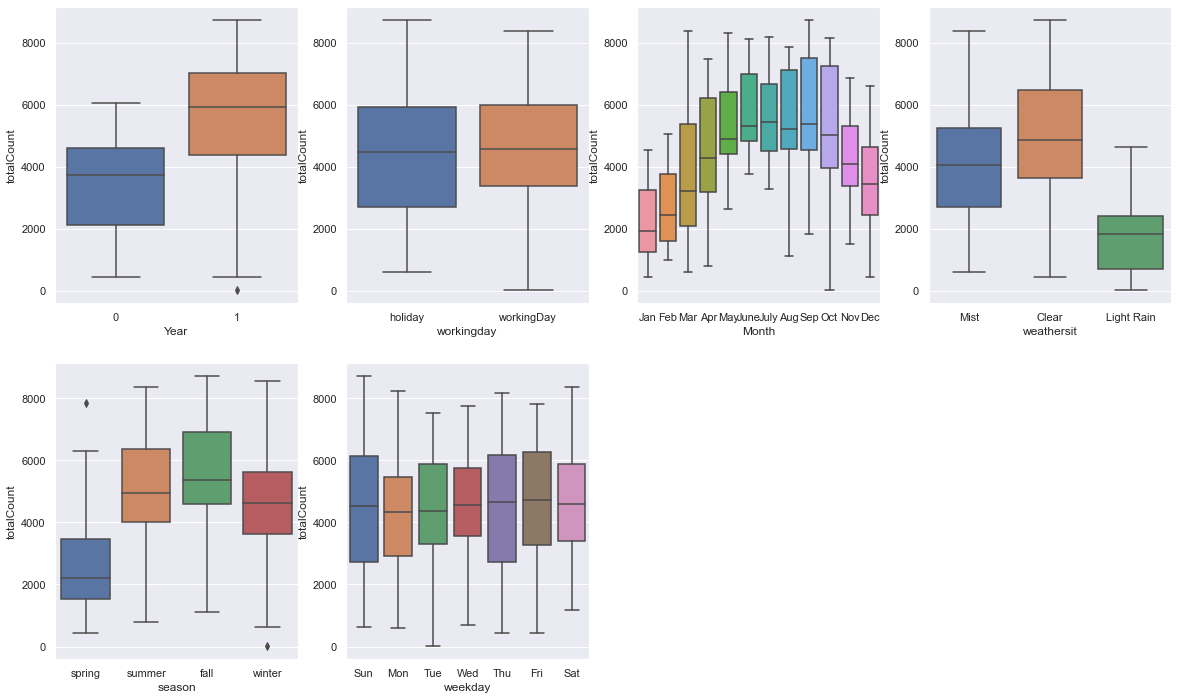

In [18]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'totalCount', data = bikedata)
plt.subplot(2,4,2)
sns.boxplot(x = 'workingday', y = 'totalCount', data = bikedata)
plt.subplot(2,4,3)
sns.boxplot(x = 'Month', y = 'totalCount', data = bikedata)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'totalCount', data = bikedata)
plt.subplot(2,4,5)
sns.boxplot(x = 'season', y = 'totalCount', data = bikedata)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'totalCount', data = bikedata)
plt.show()

### The plots above shows the relationship between categorical variables and a Target variable.

Bike Rentals are more in the year 2019 compared to 2018

Bike Rentals are more in clear weather

Bike Rentals are more during the Fall season and then in summer

Bike Rentals are more on Sunday,thursday and friday

### Season

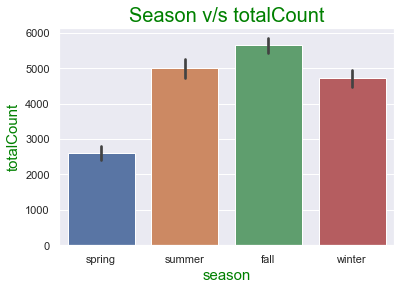

In [31]:
#Season v/s TotalCount
sns.barplot('season', 'totalCount',data= bikedata)
plt.xlabel('season',fontdict= {'size':'15','color':'green'})
plt.ylabel('totalCount',fontdict= {'size':'15','color':'green'})
plt.title('Season v/s totalCount', fontdict= {'size':'20','color':'green'})
plt.show()

## Insight: More bikes are rented during fall season

### Weathersit

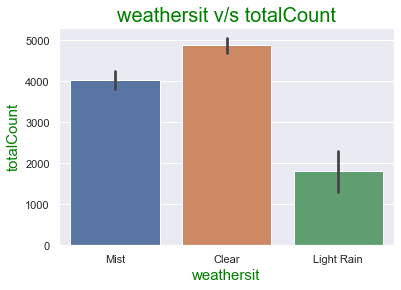

In [32]:
# weathersit v/s TotalCount
sns.barplot('weathersit', 'totalCount',data= bikedata)
plt.xlabel('weathersit',fontdict= {'size':'15','color':'green'})
plt.ylabel('totalCount',fontdict= {'size':'15','color':'green'})
plt.title('weathersit v/s totalCount', fontdict= {'size':'20','color':'green'})
plt.show()

## Insight:  More bikes are rented when weather is clear, few clouds or partly cloudy

### Weekday

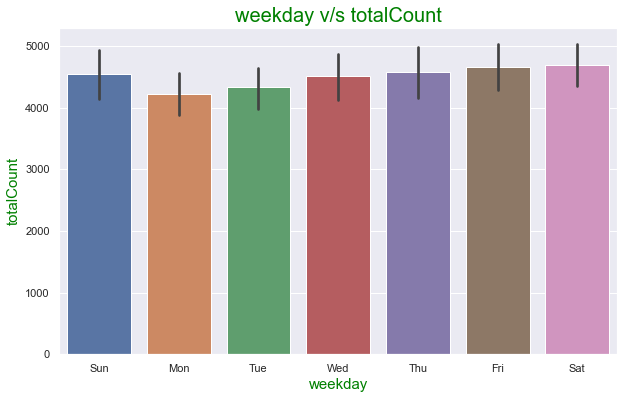

In [33]:
# weekday v/s TotalCount
plt.figure(figsize=(10,6))
sns.barplot('weekday', 'totalCount',data= bikedata)
plt.xlabel('weekday',fontdict= {'size':'15','color':'green'})
plt.ylabel('totalCount',fontdict= {'size':'15','color':'green'})
plt.title('weekday v/s totalCount', fontdict= {'size':'20','color':'green'})
plt.show()

## Insight: Bikes are more likely to be rented on weekends

### Workingday

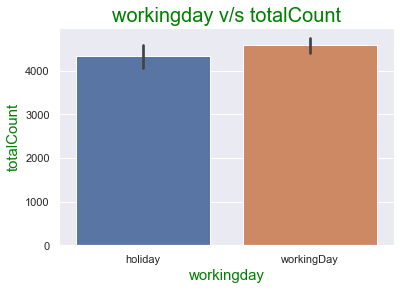

In [34]:
# workingday v/s TotalCount
sns.barplot('workingday', 'totalCount',data= bikedata)
plt.xlabel('workingday',fontdict= {'size':'15','color':'green'})
plt.ylabel('totalCount',fontdict= {'size':'15','color':'green'})
plt.title('workingday v/s totalCount', fontdict= {'size':'20','color':'green'})
plt.show()

## Insight: Bikes are more likely to be rented on workingday

### Year

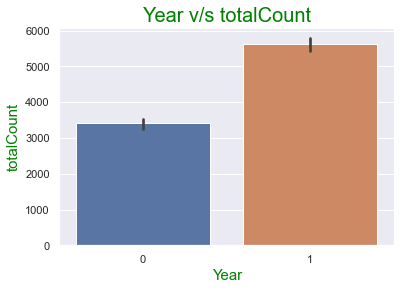

In [35]:
# Year v/s TotalCount
sns.barplot('Year','totalCount',data=bikedata)
plt.xlabel('Year',fontdict= {'size':'15','color':'green'})
plt.ylabel('totalCount',fontdict= {'size':'15','color':'green'})
plt.title('Year v/s totalCount', fontdict= {'size':'20','color':'green'})
plt.show()

## Insight: Bike rental demand has gone up from 2018 to 2019

### Month

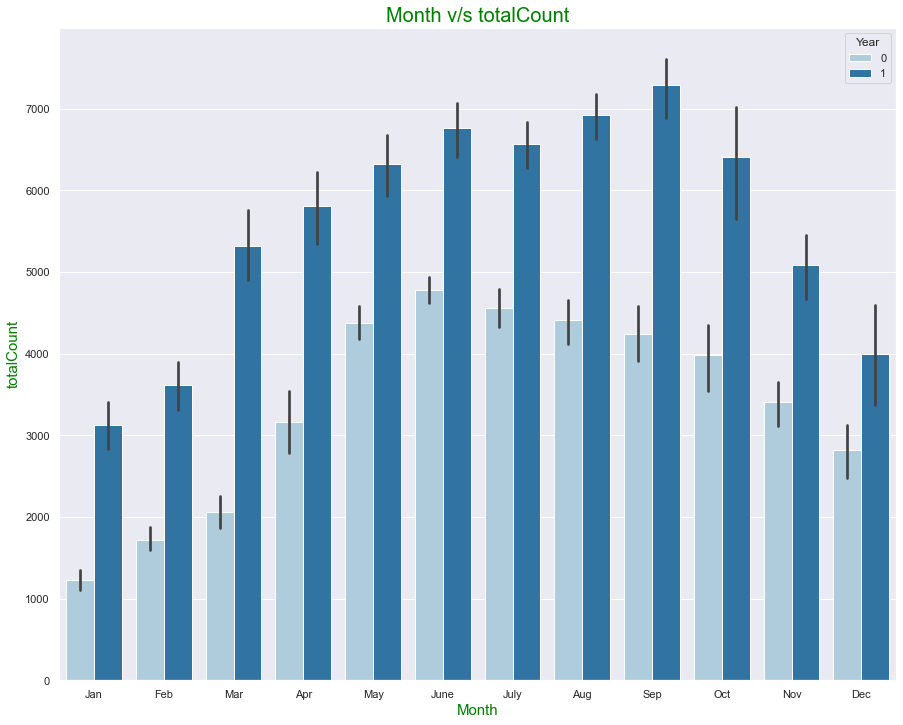

In [36]:
# Month v/s TotalCount
plt.figure(figsize=(15,12))
sns.barplot('Month','totalCount',hue='Year',data=bikedata,palette='Paired')
plt.xlabel('Month',fontdict= {'size':'15','color':'green'})
plt.ylabel('totalCount',fontdict= {'size':'15','color':'green'})
plt.title('Month v/s totalCount', fontdict= {'size':'20','color':'green'})
plt.show()

## Insight: More bikes were rented in june for year 2018 & september  for year 2019 so its not consistent

### Temp

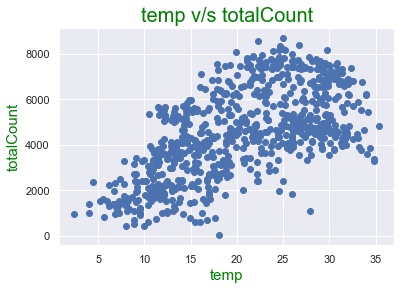

In [37]:
plt.scatter('temp','totalCount',data=bikedata)
plt.xlabel('temp',fontdict= {'size':'15','color':'green'})
plt.ylabel('totalCount',fontdict= {'size':'15','color':'green'})
plt.title('temp v/s totalCount', fontdict= {'size':'20','color':'green'})
plt.show()

## Insight:Bike Rentals are observed at higher temperatures

### atemp

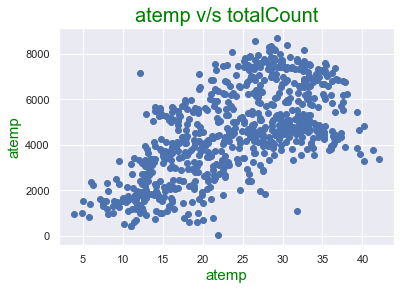

In [38]:
plt.scatter('atemp','totalCount',data=bikedata)
plt.xlabel('atemp',fontdict= {'size':'15','color':'green'})
plt.ylabel('atemp',fontdict= {'size':'15','color':'green'})
plt.title('atemp v/s totalCount', fontdict= {'size':'20','color':'green'})
plt.show()

## Insight:Bike Rentals are observed at higher "feel-like" temperatures

### Humidity

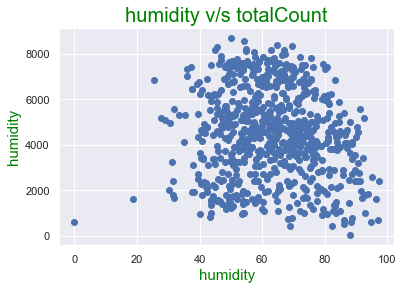

In [39]:
plt.scatter('humidity','totalCount',data=bikedata)
plt.xlabel('humidity',fontdict= {'size':'15','color':'green'})
plt.ylabel('humidity',fontdict= {'size':'15','color':'green'})
plt.title('humidity v/s totalCount', fontdict= {'size':'20','color':'green'})
plt.show()

## Insight:Bike Rentals are observed at higher humidity

### Windspeed

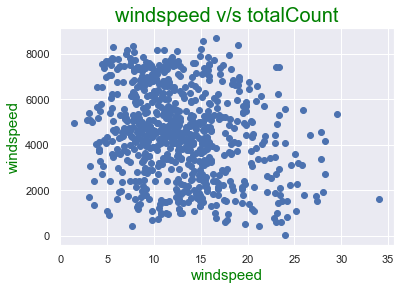

In [40]:
plt.scatter('windspeed','totalCount',data=bikedata)
plt.xlabel('windspeed',fontdict= {'size':'15','color':'green'})
plt.ylabel('windspeed',fontdict= {'size':'15','color':'green'})
plt.title('windspeed v/s totalCount', fontdict= {'size':'20','color':'green'})
plt.show()

## Insight: Wind speeds increase with a greater temperature difference.Wind speed near the surface is most highly correlated with the temperature

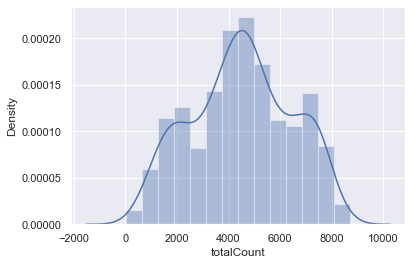

In [41]:
sns.distplot(bikedata['totalCount'])
plt.show()

## Visualizing numerical varaibles

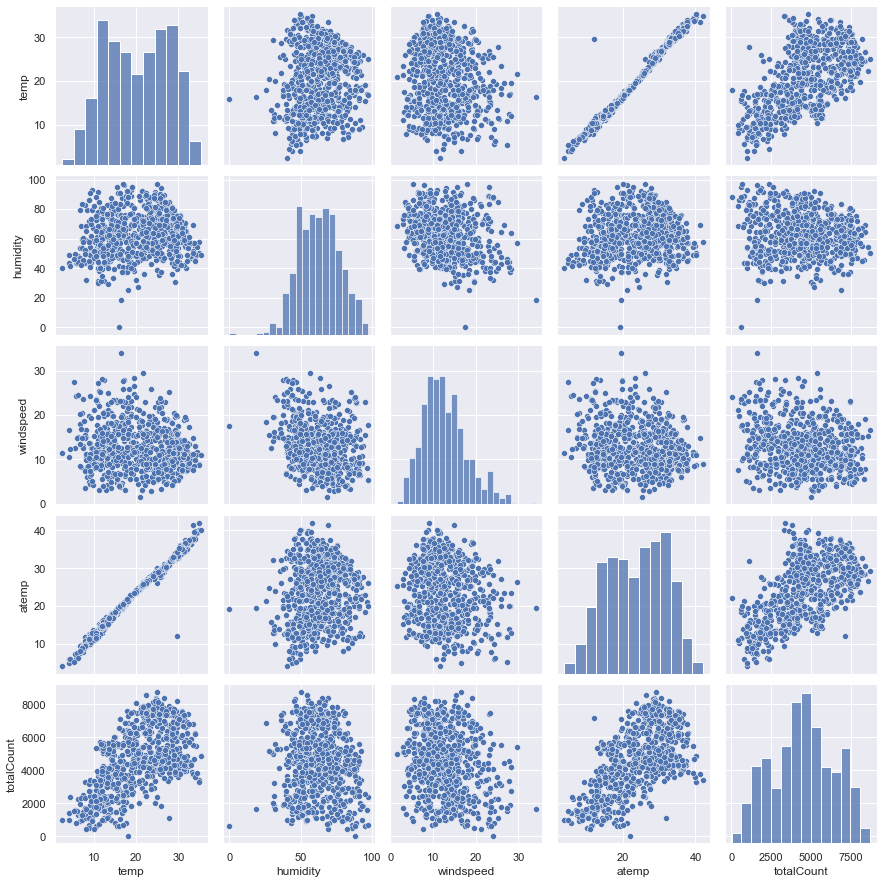

In [42]:
sns.pairplot(bikedata,  vars=["temp", "humidity",'windspeed','atemp','totalCount'])
plt.show()

<AxesSubplot:>

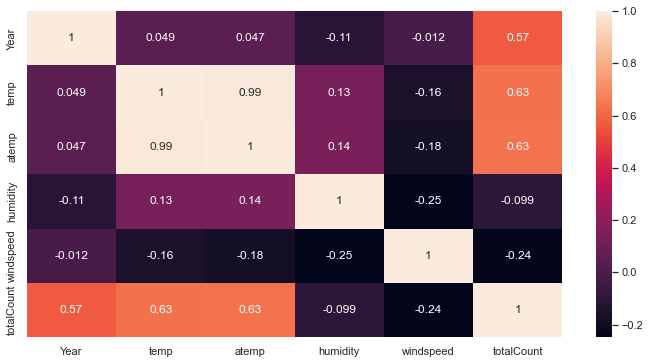

In [43]:
#heatmap
plt.figure(figsize = (12,6))
sns.heatmap(bikedata.corr(),annot=True)

## Insight : atemp and temp are highly correlated and one can be dropped to avoid multicollinearity

In [44]:
# drop temp
bikedata.drop('temp',axis=1,inplace=True)
bikedata.head()

season  Year Month weekday  workingday weathersit     atemp  humidity  \
0  spring     0   Jan     Sun     holiday       Mist  18.18125   80.5833   
1  spring     0   Jan     Mon     holiday       Mist  17.68695   69.6087   
2  spring     0   Jan     Tue  workingDay      Clear   9.47025   43.7273   
3  spring     0   Jan     Wed  workingDay      Clear  10.60610   59.0435   
4  spring     0   Jan     Thu  workingDay      Clear  11.46350   43.6957   

   windspeed  totalCount  
0  10.749882         985  
1  16.652113         801  
2  16.636703        1349  
3  10.739832        1562  
4  12.522300        1600

## Dealing With Categorical Variables using dummy variables

In [45]:
seasons = pd.get_dummies(bikedata['season'],drop_first=True)
weekdays = pd.get_dummies(bikedata['weekday'],drop_first=True)
workingdays = pd.get_dummies(bikedata['workingday'],drop_first=True)
weather = pd.get_dummies(bikedata['weathersit'],drop_first=True)
month = pd.get_dummies(bikedata['Month'],drop_first=True)

In [46]:
bikedata= pd.concat([bikedata,seasons,workingdays,weather,month,weekdays],axis=1)
bikedata.head()

season  Year Month weekday  workingday weathersit     atemp  humidity  \
0  spring     0   Jan     Sun     holiday       Mist  18.18125   80.5833   
1  spring     0   Jan     Mon     holiday       Mist  17.68695   69.6087   
2  spring     0   Jan     Tue  workingDay      Clear   9.47025   43.7273   
3  spring     0   Jan     Wed  workingDay      Clear  10.60610   59.0435   
4  spring     0   Jan     Thu  workingDay      Clear  11.46350   43.6957   

   windspeed  totalCount  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  \
0  10.749882         985  ...    0    0    0    0    0    0    1    0    0   
1  16.652113         801  ...    0    0    0    0    1    0    0    0    0   
2  16.636703        1349  ...    0    0    0    0    0    0    0    0    1   
3  10.739832        1562  ...    0    0    0    0    0    0    0    0    0   
4  12.522300        1600  ...    0    0    0    0    0    0    0    1    0   

   Wed  
0    0  
1    0  
2    0  
3    1  
4    0  

[5 rows x 33 columns]

In [47]:
# Dropping the categorical variables as they are already dummy-encoded.
bikedata.drop(['season','workingday','weathersit','weekday','Month'],axis=1,inplace=True)
bikedata.head()

Year     atemp  humidity  windspeed  totalCount  spring  summer  winter  \
0     0  18.18125   80.5833  10.749882         985       1       0       0   
1     0  17.68695   69.6087  16.652113         801       1       0       0   
2     0   9.47025   43.7273  16.636703        1349       1       0       0   
3     0  10.60610   59.0435  10.739832        1562       1       0       0   
4     0  11.46350   43.6957  12.522300        1600       1       0       0   

   workingDay  Light Rain  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  \
0           0           0  ...    0    0    0    0    0    0    1    0    0   
1           0           0  ...    0    0    0    0    1    0    0    0    0   
2           1           0  ...    0    0    0    0    0    0    0    0    1   
3           1           0  ...    0    0    0    0    0    0    0    0    0   
4           1           0  ...    0    0    0    0    0    0    0    1    0   

   Wed  
0    0  
1    0  
2    0  
3    1  
4    0  

[5 rows x 28 columns]

## Splitting the dataset

In [48]:
#import the library
from sklearn.model_selection import train_test_split

#split
np.random.seed(0)
bike_train, bike_test = train_test_split(bikedata, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
#check shape
print(bike_train.shape)
print(bike_test.shape)

(510, 28)
(219, 28)


## Rescaling

In [50]:
#import the library
from sklearn.preprocessing import StandardScaler

#Instantiate an object
scaler = StandardScaler()

In [51]:
#Create a list of numeric variables
num_vars=['atemp','humidity','windspeed','totalCount']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

Year     atemp  humidity  windspeed  totalCount  spring  summer  winter  \
653     1 -0.055878 -0.514725  -0.117752    1.562685       0       0       1   
576     1  1.194106  0.516433  -0.330615    1.399629       0       0       0   
426     1 -0.348834 -0.069854  -0.385694   -0.215554       1       0       0   
728     1 -1.473492 -1.045032   2.018143   -1.379511       1       0       0   
482     1 -0.571474 -1.000840  -0.779889   -0.136589       0       1       0   

     workingDay  Light Rain  ...  May  Nov  Oct  Sep  Mon  Sat  Sun  Thu  Tue  \
653           1           0  ...    0    0    1    0    0    0    0    0    0   
576           1           0  ...    0    0    0    0    0    0    0    0    0   
426           0           0  ...    0    0    0    0    0    0    1    0    0   
728           0           0  ...    0    0    0    0    1    0    0    0    0   
482           0           0  ...    0    0    0    0    0    0    1    0    0   

     Wed  
653    1  
576    1  
426    0  
728    0  
482    0  

[5 rows x 28 columns]

In [52]:
#Checking numeric variables(min and max) after scaling
bike_train.describe()

Year         atemp      humidity     windspeed    totalCount  \
count  510.000000  5.100000e+02  5.100000e+02  5.100000e+02  5.100000e+02   
mean     0.507843  4.193813e-16 -3.459107e-16 -2.333645e-16 -5.398732e-17   
std      0.500429  1.000982e+00  1.000982e+00  1.000982e+00  1.000982e+00   
min      0.000000 -2.417741e+00 -4.462565e+00 -1.890981e+00 -2.289141e+00   
25%      0.000000 -8.526058e-01 -7.666192e-01 -7.167878e-01 -7.006213e-01   
50%      1.000000  6.514277e-02  2.294988e-02 -1.415145e-01  2.236523e-02   
75%      1.000000  8.269866e-01  7.167702e-01  5.522525e-01  7.625291e-01   
max      1.000000  2.295305e+00  2.399023e+00  4.004188e+00  2.167738e+00   

           spring      summer     winter  workingDay  Light Rain  ...  \
count  510.000000  510.000000  510.00000  510.000000  510.000000  ...   
mean     0.243137    0.245098    0.24902    0.676471    0.029412  ...   
std      0.429398    0.430568    0.43287    0.468282    0.169124  ...   
min      0.000000    0.000000    0.00000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.00000    0.000000    0.000000  ...   
50%      0.000000    0.000000    0.00000    1.000000    0.000000  ...   
75%      0.000000    0.000000    0.00000    1.000000    0.000000  ...   
max      1.000000    1.000000    1.00000    1.000000    1.000000  ...   

              May         Nov         Oct         Sep         Mon         Sat  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.084314    0.086275    0.086275    0.080392    0.143137    0.127451   
std      0.278131    0.281045    0.281045    0.272166    0.350557    0.333805   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Sun         Thu         Tue         Wed  
count  510.000000  510.000000  510.000000  510.000000  
mean     0.154902    0.158824    0.150980    0.131373  
std      0.362166    0.365870    0.358381    0.338139  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 28 columns]

### Dividing into X and Y sets for the model building

In [53]:
y_train = bike_train.pop('totalCount')
X_train = bike_train

## Recursive feature elimination(RFE)

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [56]:
# Checking which parameters have been selected in that list of 10
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('Year', True, 1),
 ('atemp', True, 1),
 ('humidity', False, 11),
 ('windspeed', False, 7),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', False, 2),
 ('workingDay', True, 1),
 ('Light Rain', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 18),
 ('May', False, 8),
 ('Nov', False, 3),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', True, 1),
 ('Thu', False, 17),
 ('Tue', False, 13),
 ('Wed', False, 14)]

In [57]:
# storing the selected 10 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['Year', 'atemp', 'spring', 'workingDay', 'Light Rain', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [58]:
# checking which columns have been eleminated
X_train.columns[~rfe.support_]

Index(['humidity', 'windspeed', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sat', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [59]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Model1

In [60]:
import statsmodels.api as sm

# Add constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# create first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

#print summary
print(lr1.summary())    

                            OLS Regression Results                            
Dep. Variable:             totalCount   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     230.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          5.59e-180
Time:                        23:36:46   Log-Likelihood:                -283.26
No. Observations:                 510   AIC:                             588.5
Df Residuals:                     499   BIC:                             635.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6022      0.122     -4.934      0.0

### Insight: Dropping sun as its insignificant

In [61]:
X_train_1 = X_train_lm1.drop(['Mon'], axis =1)

## Model2

In [62]:
# Add constant
X_train_2 = sm.add_constant(X_train_1)

# create first fitted model
lr2 = sm.OLS(y_train, X_train_2).fit()

#print summary
print(lr2.summary())   

                            OLS Regression Results                            
Dep. Variable:             totalCount   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.69e-180
Time:                        23:36:53   Log-Likelihood:                -284.90
No. Observations:                 510   AIC:                             589.8
Df Residuals:                     500   BIC:                             632.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4057      0.054     -7.502      0.0

In [63]:
#Now we have all the variables with p-value less than 0.05
X_train_new= X_train_2.drop('const',axis=1)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3  workingDay  2.29
2      spring  2.04
1       atemp  2.02
0        Year  1.80
5        Mist  1.50
6        July  1.34
8         Sun  1.28
7         Sep  1.17
4  Light Rain  1.06

In [65]:
# All values are less than 5

## Residual Analysis

In [66]:
y_train_pred = lr2.predict(X_train_2)

Text(0.5, 0, 'Errors')

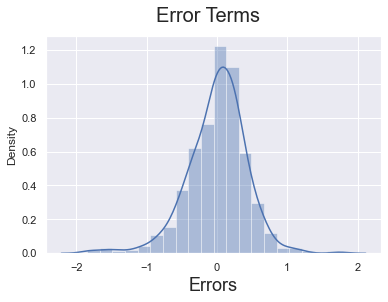

In [67]:
fig = plt.figure()
sns.distplot((y_train- y_train_pred), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

## Predictions

In [68]:
num_vars= ['atemp','humidity', 'windspeed','totalCount']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [69]:
y_test = bike_test.pop('totalCount')
X_test = bike_test

In [70]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [71]:
# Add constant
X_test_new = sm.add_constant(X_test_new)

In [72]:
y_test_pred = lr2.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'Prediction')

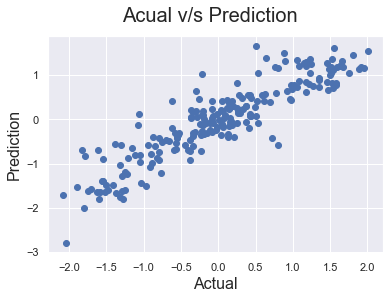

In [73]:
# Plotting y-test and y-test-pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Acual v/s Prediction',fontsize=20)
plt.xlabel('Actual', fontsize=16)
plt.ylabel('Prediction',fontsize=16)

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8102243158852291

In [75]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.81022431)*(11-1)/(11-1-1)
print(Adj_r2)

0.7891381222222221


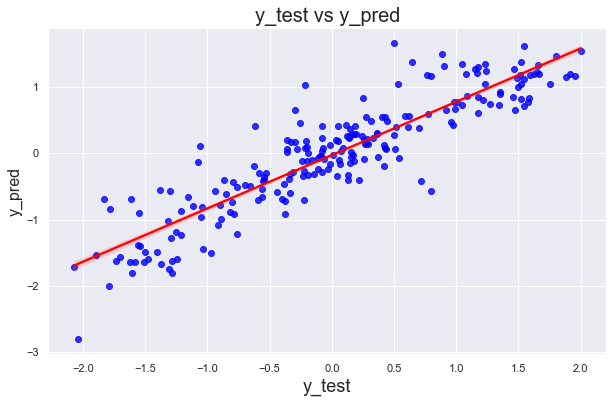

In [76]:
#Regression plot
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

## We can see that the equation of our best fitted line is:
count=0.4036×temp+0.2780×September+0.2767×Sunday+1.0482×Year+0.2332×workingday−0.6730*spring-1.2972×LightRain−0.3663×Mist−0.2897×July

### Final Result Comparison between Train model and Test:
- Train R^2 : 0.821
- Train Adjusted R^2 : 0.818
- Test R^2: 0.810
- Test Adjusted R^2: 0.789
- Difference in R^2 between train and test: 1.1%
- Difference in adjusted R^2 between Train and test: 2.9% which is less than 5%¶

## Interpretation
1. We can see that temperature variable is having the highest coefficient 0.4036, 
   which means if the temperature increases by one unit the number of bike rentals increases by 0.4036.
2. Similary, we can observe coefficients of other variables in the equation for best fitted line 
   which are positively impacting the bike rentals like sept,sunday, year and workingday.
3. We also observe that there are some variables with negative coefficients,

     a) A negative coefficient denotes that as the independent variable will increase, the dependent will decrease.
     
     b) July, Light rain , Mist + Cloudy and spring variables have negative coefficient.
     
     
4. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the 
   independent variable while holding other variables in the model constant.

## Business Related Goals for BoomBikes
The company can focus more on feeling Temperature and provide offers or improve quality of service.

We can see demand for bikes was more in 2019 than 2018, hence we can observe that as the time moves forward BoomBikes was gaining popularity however, due to Corona Pandemic the business went down, but after proper advertisement and schemes they can re-gain popularity.

We can focus more on spring season, and the month(s) of September as they have good influence on bike rentals.

We can see month of July, weather conditions like light snow, Mist and cloudy and spring season have negative coefficients and negatively correlated to bike rentals. So we can give some offers there to increase the demand.

Obviously features like weather conditions and temperatures are not in our control, but we can install good grip tyres for the snow and maybe fog lights for proper visibility and indication to other moving vehicles, so that people feel safe while driving.

BoomBikes can also reduce price initially and then increase gradually as the demand increases for the features where there is negative correlations.

## Conclusion
The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:

Spring season : -0.6730

Feeling temperature : 0.4036

Mist : -0.3663

July : -0.2897

September : 0.2780

### Assumptions of Linear Regression:
The error terms are normally distributed.

The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.

The predicted values have linear relationship with the actual values.